<a href="https://colab.research.google.com/github/Waleed18574/Waleed_Data_Analyst_Portfolio_Projects/blob/main/Python_Data_Analytics_Projects/Business_Data_Analysis_Projects/Parch%26Posey_Business_Data_Analysis/notebook/Parch%26PoseyDataAnalytics_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parch & Posey Business Data Analysis


#### This project is done by [Waleed](https://www.linkedin.com/in/waleed-data-anayst18574/)

## Problem Statment
Parch and Posey is a comapny that sell 3 paper types (standard, gloss, poster). The company's data areaccumulated for the several years and stored in 4 csv files ; orders, accounts, sales_persons and regions. As a data analyst you are required to help the management to make informed decisions by analyzing the the data and generate business insights. The management wants to acquire general knowledge of the data, and get answers for specific questions from the departments of Sales & Marketing, HR and Finance.

____
## Part 1: General EDA - Getting to Know the Data
____

### 1.1. Importing Required Packages

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

!pip install plotly==0.5.5

!pip install plotly_express

import plotly.express as px

import folium

import geocoder

import geopy

import plotly.graph_objects as go

from scipy.stats import ttest_ind

  Using cached plotly-0.5.5-py3-none-any.whl
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotly-express 0.4.1 requires plotly>=4.1.0, but you have plotly 0.5.5 which is incompatible.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 0.5.5 which is incompatible.
  Using cached plotly-5.5.0-py2.py3-none-any.whl (26.5 MB)
  Attempting uninstall: plotly
    Found existing installation: plotly 0.5.5
    Uninstalling plotly-0.5.5:
      Successfully uninstalled plotly-0.5.5


In [2]:
# print('pandas==',pd.__version__)
# import matplotlib
# print('matplotlib==',matplotlib.__version__)
# import seaborn
# print('seaborn==', seaborn.__version__)
# import plotly
# print('plotly==',plotly.__version__)
# import folium
# print('folium==', folium.__version__)
# import geocoder
# print('geocoder==',geocoder.__version__)
# import geopy
# print('geopy==',geopy.__version__)
# import scipy
# print('scipy==', scipy.__version__)

### 1.2. Data Collection and Transfromation

#### 1.2.1. Connect to Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 1.2.2. Load Data

In [4]:
orders = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parch&PoseyDataset/orders.csv', index_col = None)
accounts = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parch&PoseyDataset/accounts.csv',index_col = None)
sr = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parch&PoseyDataset/sales_representatives.csv',index_col = None)
regions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Parch&PoseyDataset/regions.csv',index_col = None)

#### 1.2.3. Prepare and transform Data

In [5]:
# change the some of the columns names in the loaded tables
orders.rename(columns = {'occurred_at':'order_date_time','id':'order_id'}, inplace = True)

accounts.rename(columns = {'id':'account_id','sales_rep_id':'sales_person_id','name':'account'}, inplace = True)

sr.rename(columns = {'id':'sales_person_id','name':'sales_person'}, inplace = True)

regions.rename(columns = {'id':'region_id','name':'region'}, inplace = True)

In [6]:
# merge the 4 dataframes
df = (orders.merge(accounts, 'inner', left_on = 'account_id', right_on = 'account_id').
      merge(sr, 'inner', left_on = 'sales_person_id', right_on = 'sales_person_id').
      merge(regions, 'inner', left_on = 'region_id', right_on = 'region_id')
      )



In [7]:
# delete the coluns that cotains 'id' except for the 'orders_id'
cols = [col for col in df.columns if 'id' in col and col != 'order_id']
df.drop(cols, axis = 1, inplace = True)

df.head()

,order_id,order_date_time,standard_qty,gloss_qty,poster_qty,total,standard_amt_usd,gloss_amt_usd,poster_amt_usd,total_amt_usd,account,website,lat,long,primary_poc,sales_person,region
0,1,10/6/2015 17:31,123,22,24,169,613.77,164.78,194.88,973.43,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,Samuel Racine,Northeast
1,2,11/5/2015 3:34,190,41,57,288,948.10,307.09,462.84,1718.03,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,Samuel Racine,Northeast
2,3,12/4/2015 4:21,85,47,0,132,424.15,352.03,0.00,776.18,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,Samuel Racine,Northeast
3,4,1/2/2016 1:18,144,32,0,176,718.56,239.68,0.00,958.24,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,Samuel Racine,Northeast
4,5,2/1/2016 19:27,108,29,28,165,538.92,217.21,227.36,983.49,Walmart,www.walmart.com,40.238496,-75.103297,Tamara Tuma,Samuel Racine,Northeast


In [8]:
# make a new coumln of 'coordinates'
df['coordinates'] = list(df[['lat', 'long']].itertuples(index=False, name=None))

# drop the 'lat' and 'long' columns
df.drop(columns = ['lat', 'long'], inplace = True)

# convert the 'order_date_time' to Datetime data type
df['order_date_time'] = pd.to_datetime(df['order_date_time'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6911 entries, 0 to 6910
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          6911 non-null   int64         
 1   order_date_time   6911 non-null   datetime64[ns]
 2   standard_qty      6911 non-null   int64         
 3   gloss_qty         6911 non-null   int64         
 4   poster_qty        6911 non-null   int64         
 5   total             6911 non-null   int64         
 6   standard_amt_usd  6911 non-null   float64       
 7   gloss_amt_usd     6911 non-null   float64       
 8   poster_amt_usd    6911 non-null   float64       
 9   total_amt_usd     6911 non-null   float64       
 10  account           6911 non-null   object        
 11  website           6911 non-null   object        
 12  primary_poc       6911 non-null   object        
 13  sales_person      6911 non-null   object        
 14  region            6911 n

### 1.3. Categorical Columns EDA

In [10]:
# list the categorical columns
cate_cols = df.select_dtypes(include = 'object').columns
cate_cols

Index(['account', 'website', 'primary_poc', 'sales_person', 'region',
       'coordinates'],
      dtype='object')

#### 1.3.1. Analysis of 'account' Columns

In [11]:
df['account'].value_counts()

Leucadia National    71
Supervalu            68
Sysco                68
Arrow Electronics    67
Mosaic               66
                     ..
INTL FCStone          1
Loews                 1
CBS                   1
Deere                 1
Mohawk Industries     1
Name: account, Length: 349, dtype: int64

In [12]:
print('Total number of distinct accounts is', len(df['account'].value_counts()))
print("Due to the large number of website, I'll focus on the top 10")

Total number of distinct accounts is 349
Due to the large number of website, I'll focus on the top 10


                  account  transactions
0       Leucadia National            71
1               Supervalu            68
2                   Sysco            68
3       Arrow Electronics            67
4                  Mosaic            66
5        General Dynamics            66
6  Archer Daniels Midland            66
7                   Fluor            65
8         Western Digital            65
9     United States Steel            65




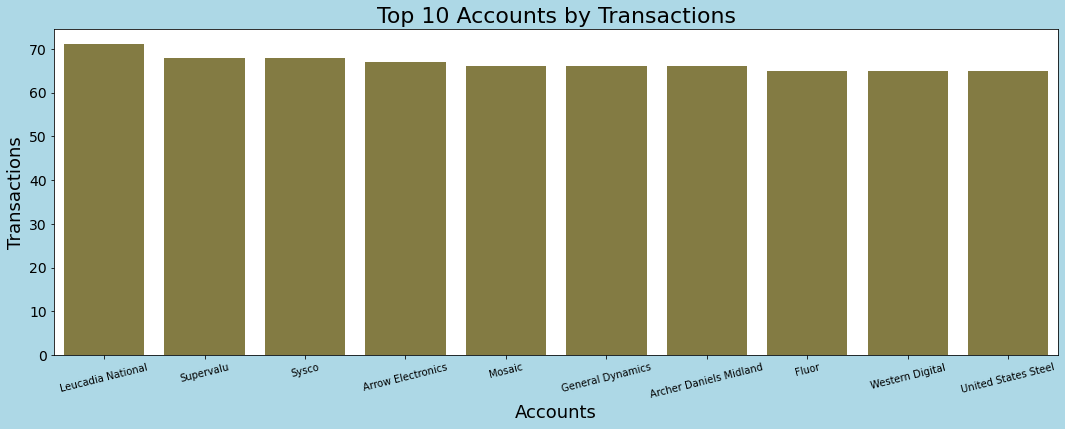

In [13]:
top10_accounts_by_count = (df['account'].
                           value_counts().
                           head(10).
                           to_frame().
                           reset_index().
                           rename(columns = {'index':'account','account':'transactions'})
                          )             
print(top10_accounts_by_count)
print('\n')


# plot the values in top10_accounts_by_count
plt.figure(figsize = (18,6), facecolor = 'lightblue')
sns.barplot(x = 'account', y = 'transactions', data = top10_accounts_by_count, color ='#8d8339')

plt.title('Top 10 Accounts by Transactions', size = 22)
plt.xlabel('Accounts', size = 18)
plt.xticks(rotation = 14)
plt.ylabel('Transactions', size = 18)
plt.yticks(size =14)
plt.show()

#### 1.3.2. Analysis of 'website' Column

In [14]:
df['website'].value_counts()

www.leucadia.com     71
www.supervalu.com    68
www.sysco.com        68
www.arrow.com        67
www.adm.com          66
                     ..
www.sands.com         1
www.lennar.com        1
www.assurant.com      1
www.loews.com         1
www.ball.com          1
Name: website, Length: 349, dtype: int64

In [15]:
print('Total number of distinct websites is',len(df['website'].value_counts()))
print("Due to the large number of websites, I'll focus on the top 10")

Total number of distinct websites is 349
Due to the large number of websites, I'll focus on the top 10


                   website  transactions
0         www.leucadia.com            71
1        www.supervalu.com            68
2            www.sysco.com            68
3            www.arrow.com            67
4              www.adm.com            66
5  www.generaldynamics.com            66
6         www.mosaicco.com            66
7            www.fluor.com            65
8              www.pmi.com            65
9   www.westerndigital.com            65




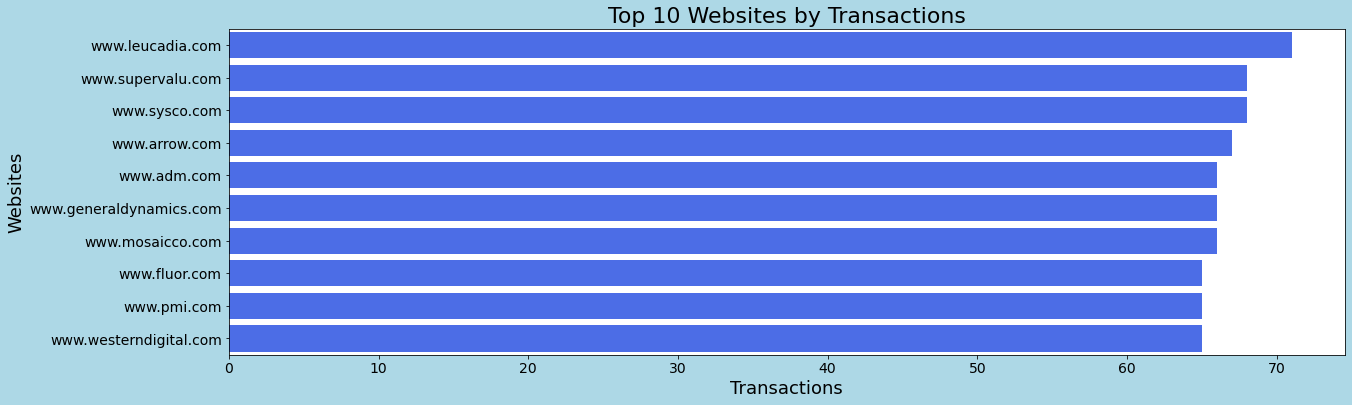

In [16]:
  top10_websites_by_count =  (df['website'].
                              value_counts().
                              head(10).
                              to_frame().
                              reset_index().rename(columns = {'index':'website','website':'transactions'})
                              )
print(top10_websites_by_count)
print('\n')

# plot top10_websites_by_count
plt.figure(figsize = (20,6), facecolor = 'lightblue')
sns.barplot(y= 'website', x = 'transactions', data = top10_websites_by_count, orient = 'h',color ='#335EFF' )

plt.title('Top 10 Websites by Transactions', size=22)
plt.xlabel('Transactions',size =18)
plt.xticks(size = 14)
plt.ylabel('Websites',size =18)
plt.yticks(size = 14)
plt.show()

#### 1.3.3. Analysis of 'region' Column

      region  transactions
0  Northeast          2356
1  Southeast          2024
2       West          1634
3    Midwest           897




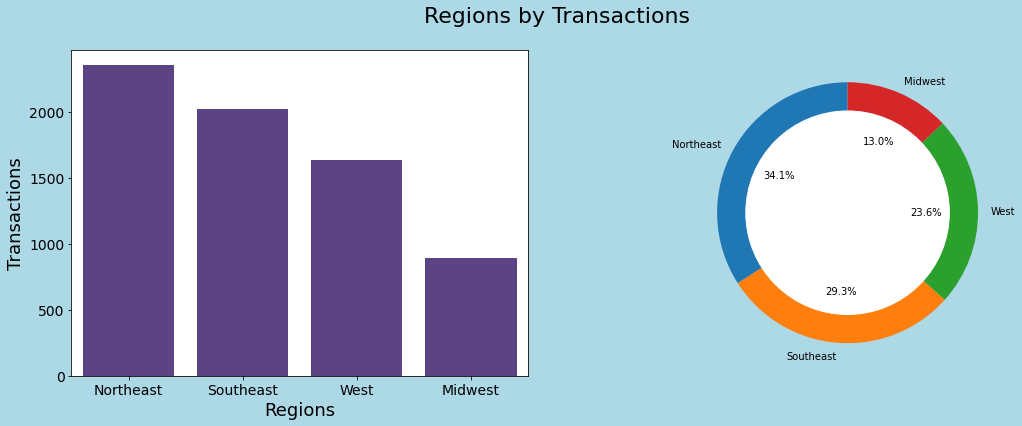

In [17]:
regions_count = (df['region'].value_counts().
                 to_frame().reset_index().
                 rename(columns = {'index':'region','region':'transactions'}))

print(regions_count)
print('\n')

# plot the values in regions_count
plt.figure(figsize = (18,6), facecolor = 'lightblue')
plt.suptitle('Regions by Transactions', size = 22)

plt.subplot(1,2,1)
sns.barplot(x = 'region',y= 'transactions', data = regions_count, color = '#59398d' )
plt.xlabel('Regions',size = 18)
plt.xticks(size = 14)
plt.ylabel('Transactions',size = 18)
plt.yticks(size = 14)

plt.subplot(1,2,2)
plt.pie(x = regions_count['transactions'],
        labels = regions_count['region'],
        startangle= 90,
        autopct= '%2.1F%%')
circle = plt.Circle((0,0), 0.78, color = 'white')
get_current_figure = plt.gcf()
get_current_figure.gca().add_artist(circle)


plt.show()

#### 1.3.4. Analysis of 'sales_perso' Column

In [18]:
df['sales_person'].value_counts()

Earlie Schleusner        335
Vernita Plump            299
Tia Amato                267
Georgianna Chisholm      256
Moon Torian              250
Nelle Meaux              241
Maren Musto              224
Dorotha Seawell          208
Charles Bidwell          205
Maryanna Fiorentino      204
Calvin Ollison           199
Sibyl Lauria             192
Elwood Shutt             191
Hilma Busick             191
Arica Stoltzfus          186
Delilah Krum             185
Gianna Dossey            184
Micha Woodford           179
Michel Averette          173
Elna Condello            168
Brandie Riva             167
Cliff Meints             151
Necole Victory           136
Samuel Racine            134
Eugena Esser             116
Dawna Agnew              116
Debroah Wardle           116
Julia Behrman            115
Saran Ram                106
Derrick Boggess          102
Shawanda Selke           100
Cordell Rieder            99
Marquetta Laycock         90
Ernestine Pickron         89
Ayesha Monica 

In [19]:
print('Total number of distinct salespeople is',len(df['sales_person'].value_counts()))
print("Due to the large number of salespeople, I'll focus on the top 10")

Total number of distinct salespeople is 50
Due to the large number of salespeople, I'll focus on the top 10


          sales_person  transactions
0    Earlie Schleusner           335
1        Vernita Plump           299
2            Tia Amato           267
3  Georgianna Chisholm           256
4          Moon Torian           250
5          Nelle Meaux           241
6          Maren Musto           224
7      Dorotha Seawell           208
8      Charles Bidwell           205
9  Maryanna Fiorentino           204




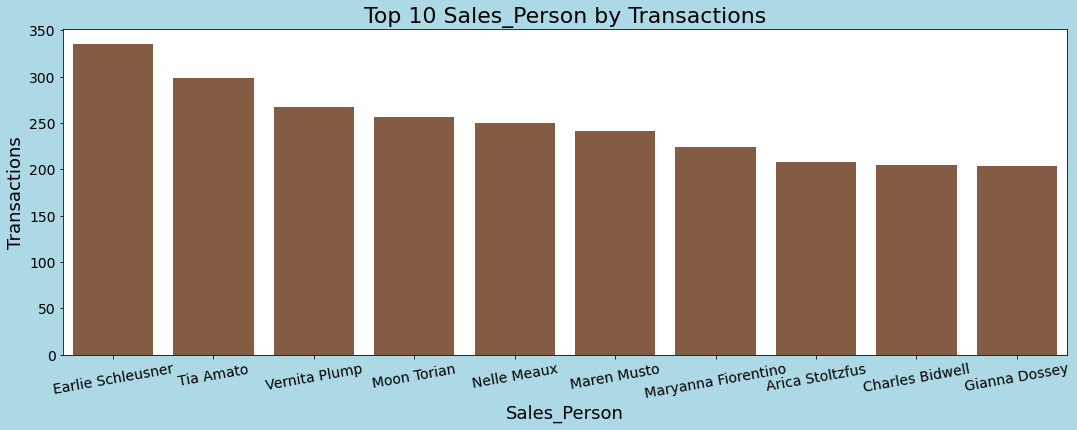

In [20]:
sales_persons_count = df['sales_person'].\
                      value_counts().\
                      to_frame().reset_index().\
                      rename(columns = {'index':'sales_person','sales_person':'transactions'}).\
                      head(10)

print(sales_persons_count)
print('\n')

# plot the values in sales_persons_count
plt.figure(figsize = (18,6), facecolor = 'lightblue')
ax = sns.barplot(x = 'sales_person',y= 'transactions', data = sales_persons_count, color = '#8D5939' )
ax.set_xticklabels(labels = ['Earlie Schleusner','Tia Amato','Vernita Plump','Moon Torian',
                             'Nelle Meaux','Maren Musto','Maryanna Fiorentino','Arica Stoltzfus',
                             'Charles Bidwell','Gianna Dossey'], ha = 'center')
    
plt.title('Top 10 Sales_Person by Transactions', size = 22)
plt.xlabel('Sales_Person',size = 18)
plt.xticks(size = 14, rotation = 10)
plt.ylabel('Transactions',size = 18)
plt.yticks(size = 14)
plt.show()

#### 1.3.5. Analysis of 'primary_poc' Column

In [21]:
df['primary_poc'].value_counts()

Tamara Tuma         89
Merrill Rubino      71
Julia Laracuente    68
Kristopher Moton    68
Jodee Lupo          67
                    ..
Aura Walz            1
Sherell Yankey       1
Harrison Foss        1
Candi Vanleer        1
Jared Aikins         1
Name: primary_poc, Length: 328, dtype: int64

In [22]:
print('Total number of distinct primary-poc is',len(df['primary_poc'].value_counts()))
print("Due to the large number of primary-poc, I'll focus on the top 10")

Total number of distinct primary-poc is 328
Due to the large number of primary-poc, I'll focus on the top 10


        primary_poc  transactions
0       Tamara Tuma            89
1    Merrill Rubino            71
2  Julia Laracuente            68
3  Kristopher Moton            68
4        Jodee Lupo            67
5    Craig Mcalpine            67
6     Lorette Blasi            66
7      Fay Rogowski            66
8    Erin Viverette            66
9    Racquel Andrus            65




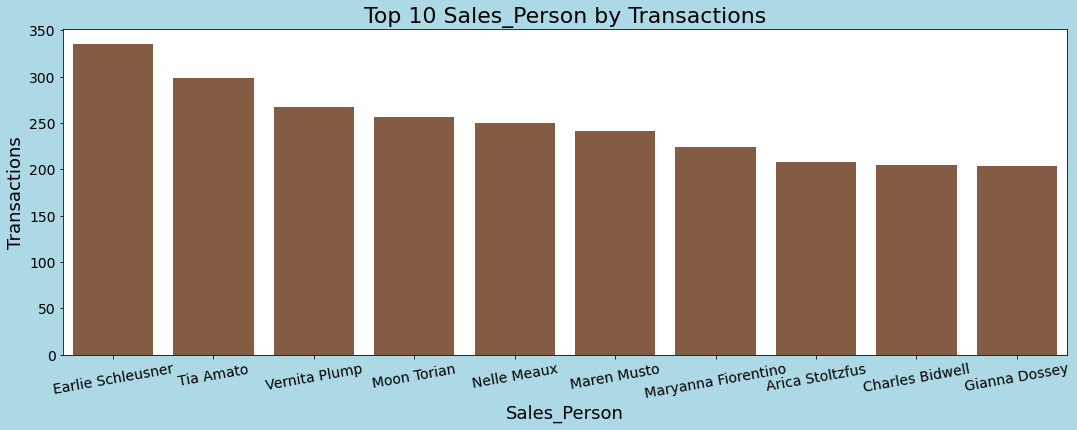

In [23]:
priamry_poc_counts=(df['primary_poc'].value_counts().
                    to_frame().reset_index().
                    rename(columns = {'index':'primary_poc','primary_poc':'transactions'}).head(10)
                   )
print(priamry_poc_counts)
print('\n')

# plot the values in sales_persons_count
plt.figure(figsize = (18,6), facecolor = 'lightblue')
ax = sns.barplot(x = 'sales_person',y= 'transactions', data = sales_persons_count, color = '#8D5939' )
ax.set_xticklabels(labels = ['Earlie Schleusner','Tia Amato','Vernita Plump','Moon Torian',
                             'Nelle Meaux','Maren Musto','Maryanna Fiorentino','Arica Stoltzfus',
                             'Charles Bidwell','Gianna Dossey'], ha = 'center')
    
plt.title('Top 10 Sales_Person by Transactions', size = 22)
plt.xlabel('Sales_Person',size = 18)
plt.xticks(size = 14, rotation = 10)
plt.ylabel('Transactions',size = 18)
plt.yticks(size = 14)
plt.show()

#### 1.3.6. Analysis of 'coordinates' Column
For 'coordinates' column, it would be more beneficial if I assign the corresponding city or county to a column then analyze it. This requires a few more steps than previous. I will do the following:
- Initialize the geolocator, and make an empty list named 'locations'.
- Loop through each coordinate value to get the location dictionary.
- Select the 'address' key in the location dictionary and get its dictionary.
- If 'city' is among the keys of 'address', append its value to 'locations', else assign the 
values of 'county' to the 'locations'.
- Assign the values of the 'locations' list to a new column in the dataframe.

In [24]:
df['coordinates'].value_counts()

(35.52252305, -86.10327108)           71
(33.78951934, -84.43800424)           68
(40.76252413, -73.97753022)           68
(41.87858356, -87.62737294)           67
(42.35930205, -71.05137356)           66
                                      ..
(36.15614254, -115.13748600000001)     1
(36.18032753, -115.13596409999998)     1
(40.75497089, -73.98233134)            1
(42.35998456, -71.06380494)            1
(36.52809264, -86.29157427)            1
Name: coordinates, Length: 349, dtype: int64

In [25]:
print('Total number of distinct coordinates tuples is',len(df['coordinates'].value_counts()))
print("Due to the large number of coordinates, I'll focus on the top 10")

Total number of distinct coordinates tuples is 349
Due to the large number of coordinates, I'll focus on the top 10


In [26]:
top10_locations_count = df['coordinates'].value_counts().\
                        to_frame().reset_index().\
                        rename(columns = {'index':'coordinates','coordinates':'transactions'}).head(10)
top10_locations_count

,coordinates,transactions
0,"(35.52252305, -86.10327108)",71
1,"(33.78951934, -84.43800424)",68
2,"(40.76252413, -73.97753022)",68
3,"(41.87858356, -87.62737294)",67
4,"(42.35930205, -71.05137356)",66
5,"(38.6431842, -121.9092885)",66
6,"(41.92373676, -75.99411481)",66
7,"(33.70114178, -84.38702725)",65
8,"(33.771615600000004, -84.29436015)",65
9,"(42.35788906, -71.06260265)",65


In [27]:
# import geopy.geocoders
from geopy.geocoders import Nominatim
# initialize the geopy.geocoders
geolocator = Nominatim(user_agent="locations_count")

# make an empty list of locations
locations = []
# loop through each values in the 'oordinates'
for val in top10_locations_count['coordinates'].values:
    # get the location info for each coordinate which is a dictionary
    loc = geolocator.reverse(str(val[0])+","+str(val[1]))
    # use the .raw method to get the dictionary assigned to the 'address' key in the loc ditionary
    # use the .keys() method to get the keys of the 'address' dictionary
    # check if 'city' among the keys of the 'address' dictionary
    if 'city' in  loc.raw['address'].keys():
        # append the value of the key 'city' to 'locations' list
        city = loc.raw['address']['city']
        locations.append(city)
        # if 'city' is not among the keys of the 'address' dictionary, check for 'county'
    elif 'county' in  loc.raw['address'].keys():
        # assign the valu of th 'county' key to variable named county
        county = loc.raw['address']['county']
        # append the county value to the locations
        locations.append(county)
    else:
        locations.append('NA')

# assign the values of locations list ot the new column 'locations' in the dataframe
top10_locations_count['locations'] = locations

top10_locations_count


,coordinates,transactions,locations
0,"(35.52252305, -86.10327108)",71,Coffee County
1,"(33.78951934, -84.43800424)",68,Atlanta
2,"(40.76252413, -73.97753022)",68,New York County
3,"(41.87858356, -87.62737294)",67,Chicago
4,"(42.35930205, -71.05137356)",66,Boston
5,"(38.6431842, -121.9092885)",66,Yolo County
6,"(41.92373676, -75.99411481)",66,Susquehanna County
7,"(33.70114178, -84.38702725)",65,Atlanta
8,"(33.771615600000004, -84.29436015)",65,DeKalb County
9,"(42.35788906, -71.06260265)",65,Boston


I tried the following code here to generate a folium map with markers, but it did not work and generated a RecursionError. So, just skip it. However, it works on my local machine!

In [28]:
# # make a basic map
# top10_locations_map = folium.Map(location = (42.0988316272597 ,-98.82989549371113),zoom_start=4)

# # loop through th rows of top10_locations_count
# for index,row in top10_locations_count.iterrows():
#     # add a merker for each corrdinate with popup and tooltip
#     folium.Marker(location = [str(row.loc['coordinates'][0]),str(row.loc['coordinates'][1])],
#                   popup = row.loc['locations'],
#                   tooltip = row.loc['locations']+' '+'Transactions: '+ str(row.loc['transactions'])).add_to(top10_locations_map)

# print('Top 10 Locations by Transactions (Zoom in to see the 2 values of Atlanta)')
# top10_locations_map

The next code works

In [29]:
# make a basic map
top10_locations_map = folium.Map(location = (42.0988316272597 ,-98.82989549371113),zoom_start=4)

top10_locations_count.apply(lambda row: folium.Marker(location=[row['coordinates'][0], row['coordinates'][1]],
                                                      popup = row['locations']+' Transactions:'+ str(row['transactions'])).add_to(top10_locations_map), axis = 1)

print('Zoon in to see the 2 values for Atlanta (2 locations in the same city)')
print('\n')

top10_locations_map

Zoon in to see the 2 values for Atlanta (2 locations in the same city)




__Most of the top 10 orders are from the East Region of the USA__

### 1.4. Numeric Columns EDA

#### 1.4.1. Revenue Columns EDA

In [30]:
rev_cols = ['total_amt_usd','standard_amt_usd','gloss_amt_usd','poster_amt_usd']
qty_cols = ['total','standard_qty','gloss_qty','poster_qty']

In [31]:
for col in rev_cols:
  print(col,' Statistics:')
  print(df[col].describe())
  print('\n\n')

total_amt_usd  Statistics:
count      6911.000000
mean       3348.447631
std        5462.421417
min           0.000000
25%        1415.155000
50%        2483.160000
75%        3362.250000
max      232207.070000
Name: total_amt_usd, dtype: float64



standard_amt_usd  Statistics:
count      6911.000000
mean       1399.558174
std        2175.798911
min           0.000000
25%         259.480000
50%        1447.100000
75%        2455.080000
max      112729.090000
Name: standard_amt_usd, dtype: float64



gloss_amt_usd  Statistics:
count      6911.000000
mean       1098.679282
std        2715.291124
min           0.000000
25%          74.900000
50%         232.190000
75%         749.000000
max      106964.690000
Name: gloss_amt_usd, dtype: float64



poster_amt_usd  Statistics:
count      6911.000000
mean        850.210175
std        4087.276878
min           0.000000
25%          64.960000
50%         203.000000
75%         747.040000
max      229487.440000
Name: poster_amt_usd, dtype: flo

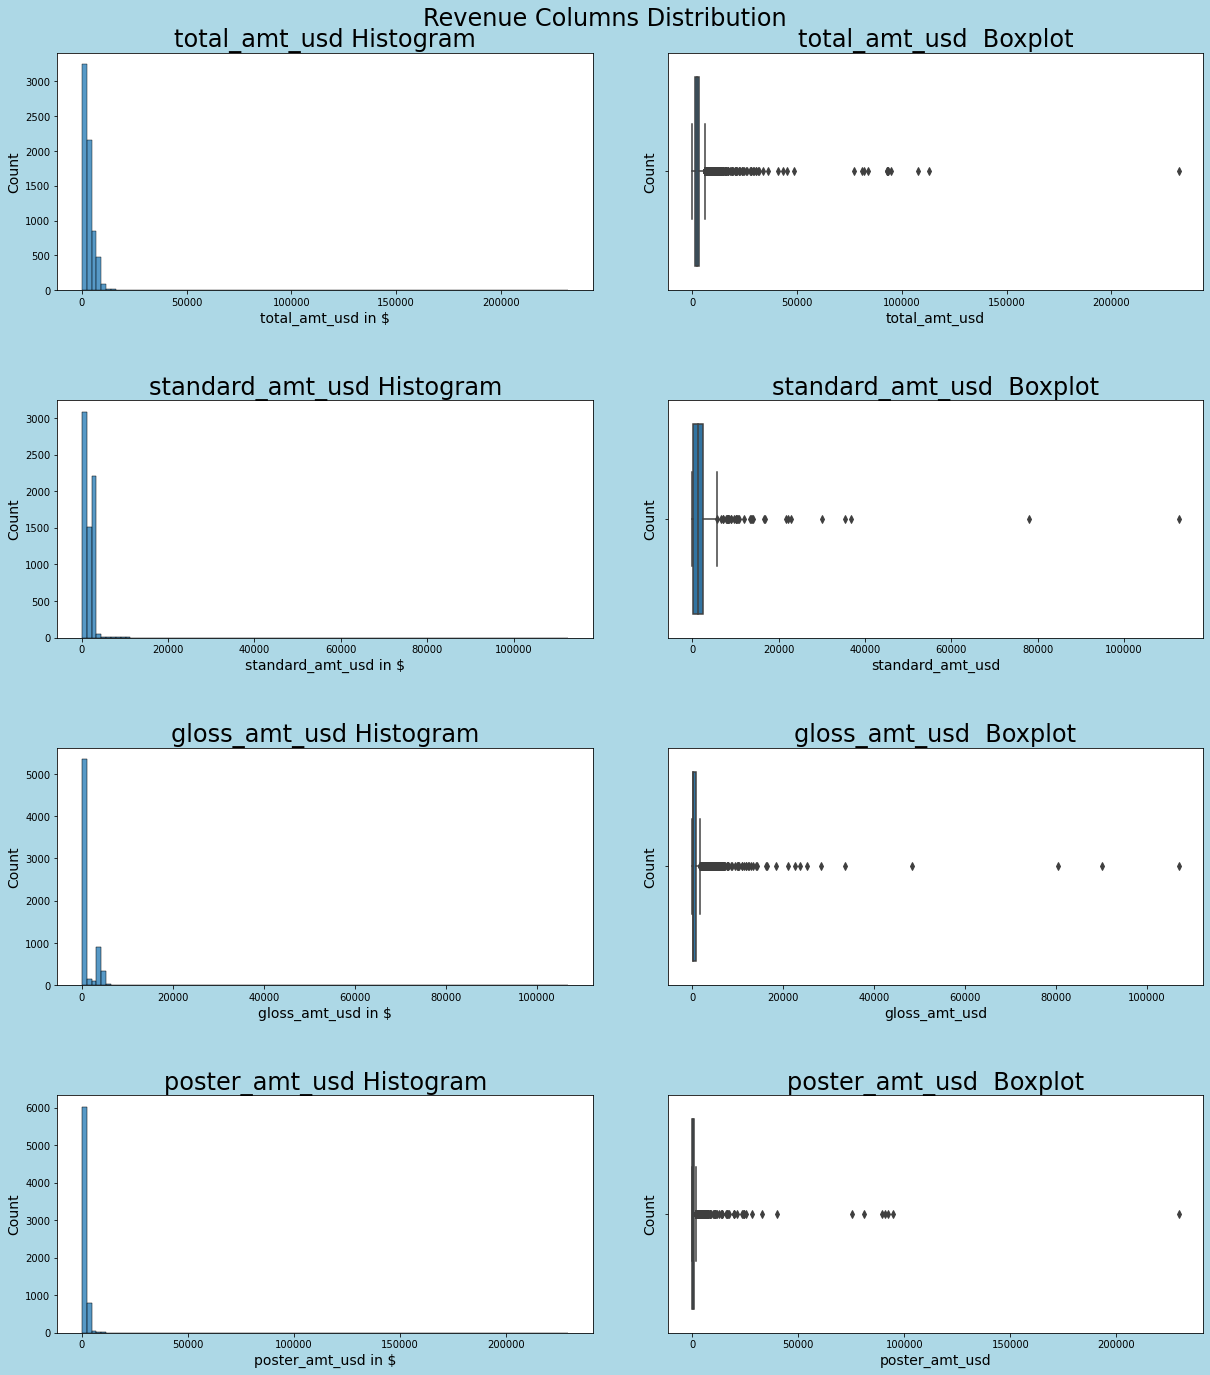

In [32]:
plt.figure(figsize = (18,20), facecolor = 'lightblue')
for i,col in enumerate(rev_cols):
    plt.suptitle('Revenue Columns Distribution', fontsize = 24)
    plt.subplot(4,2,i*2+1)
    #plt.hist(df[col],bins = 100,color = '#335EFF',alpha = 0.75, edgecolor = 'black', linewidth=2)
    sns.histplot(x= df[col], bins = 100)
    plt.title(f'{col} Histogram', fontsize = 24)
    plt.xlabel(f'{col} in $', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)
    
    plt.subplot(4,2,i*2+2)
    sns.boxplot(x = df[col])
    plt.title(f'{col}  Boxplot', fontsize = 24)
    plt.xlabel(f'{col}', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)

__There are few large orders that caused the revenue data (and hence the quantity data) to be skewed to the right.For now, I just want to take a glance at the data without the outliers. I'll use the revenue to filter the data and I'll change the bin size to 30. Since the lower_limit is going to be negative, I'll use only the upper_limit for filtering.__

In [33]:
q1 = df['total_amt_usd'].quantile(q = 0.25)
q3 = df['total_amt_usd'].quantile(q = 0.75)
iqr = q3-q1
lower_limit = q1 - 1.5*iqr
upper_limit = q3 + 1.5*iqr

In [34]:
df_without_outliers = df[df['total_amt_usd'] <= upper_limit]

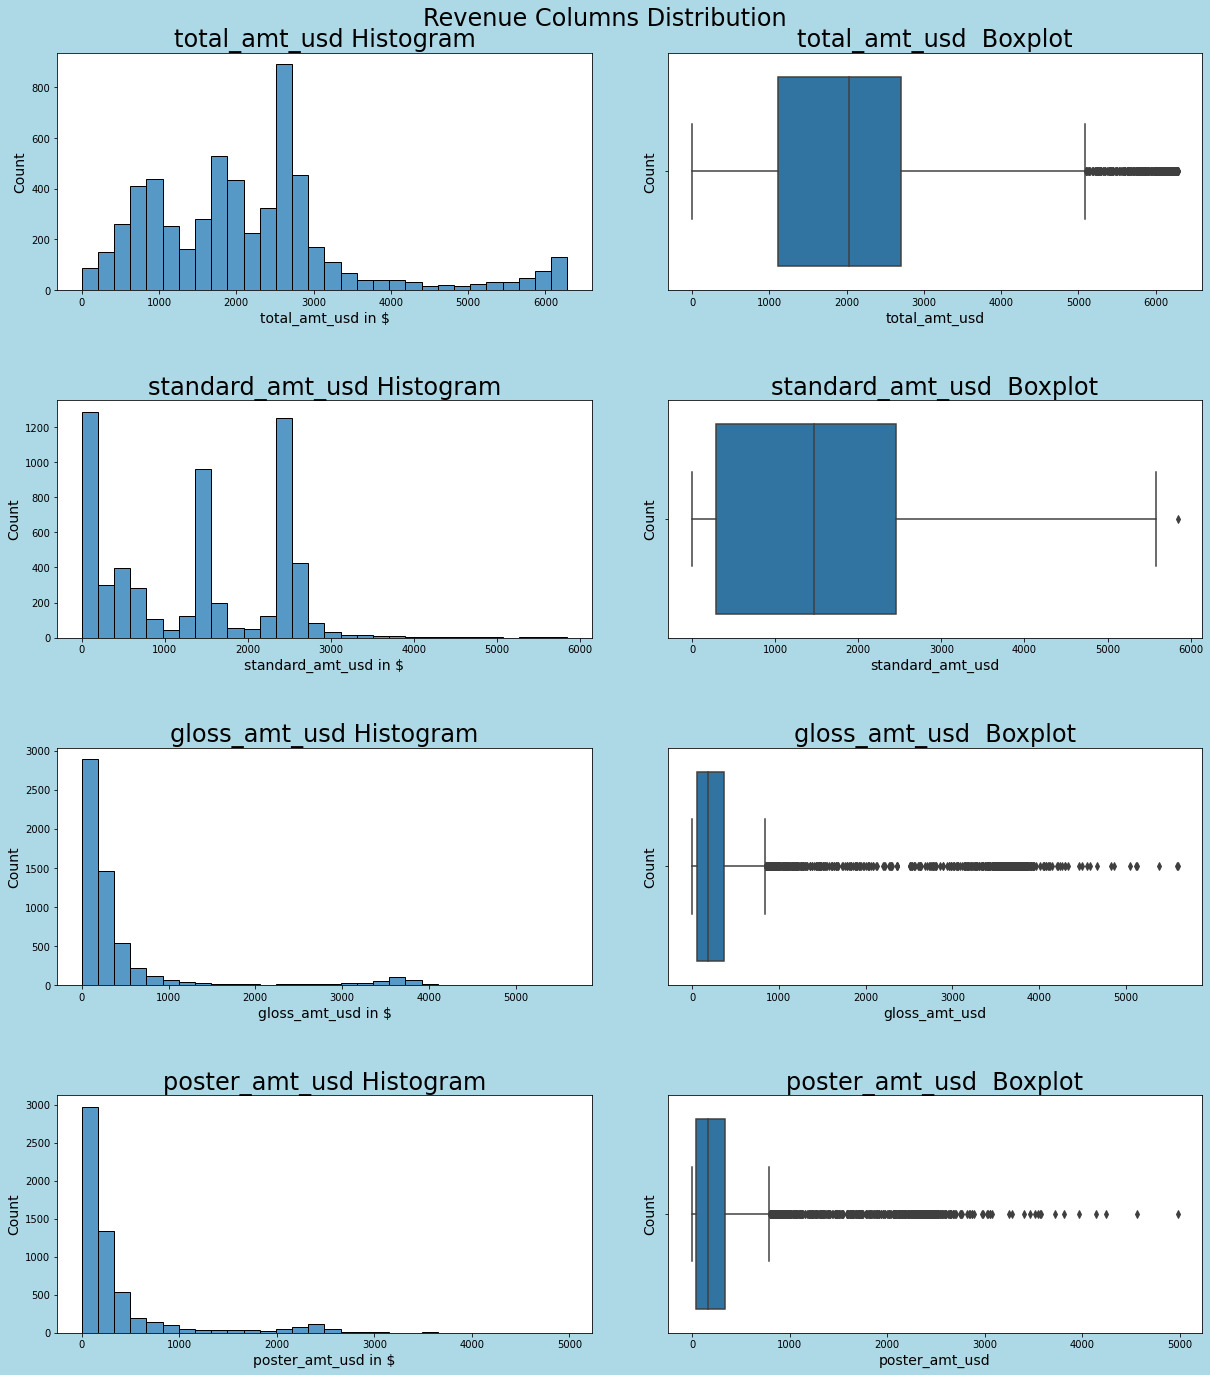

In [35]:
plt.figure(figsize = (18,20), facecolor = 'lightblue')
for i,col in enumerate(rev_cols):
    plt.suptitle('Revenue Columns Distribution', fontsize = 24)
    plt.subplot(4,2,i*2+1)
    #plt.hist(df[col],bins = 100,color = '#335EFF',alpha = 0.75, edgecolor = 'black', linewidth=2)
    sns.histplot(x= df_without_outliers[col], bins = 30)
    plt.title(f'{col} Histogram', fontsize = 24)
    plt.xlabel(f'{col} in $', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)
    
    plt.subplot(4,2,i*2+2)
    sns.boxplot(x = df_without_outliers[col])
    plt.title(f'{col}  Boxplot', fontsize = 24)
    plt.xlabel(f'{col}', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)

- There are still outliers in the revnue columns even after removing the outliers in the original data.
- The histogram of the satndard_amt_usd resembles that of the total_amt_usd which suggests highest correlation among 'standard_amt_usd', 'poster_amt_usd' and 'gloss_amt_usd'.

#### 1.4.2. Quantity Columns EDA

In [36]:
for col in qty_cols:
  print(col,' Statistics:')
  print(df[col].describe())
  print('\n\n')

total  Statistics:
count     6911.000000
mean       531.864419
std        761.558145
min          0.000000
25%        214.500000
50%        480.000000
75%        603.500000
max      28799.000000
Name: total, dtype: float64



standard_qty  Statistics:
count     6911.000000
mean       280.472580
std        436.031846
min          0.000000
25%         52.000000
50%        290.000000
75%        492.000000
max      22591.000000
Name: standard_qty, dtype: float64



gloss_qty  Statistics:
count     6911.000000
mean       146.686153
std        362.522179
min          0.000000
25%         10.000000
50%         31.000000
75%        100.000000
max      14281.000000
Name: gloss_qty, dtype: float64



poster_qty  Statistics:
count     6911.000000
mean       104.705687
std        503.359221
min          0.000000
25%          8.000000
50%         25.000000
75%         92.000000
max      28262.000000
Name: poster_qty, dtype: float64





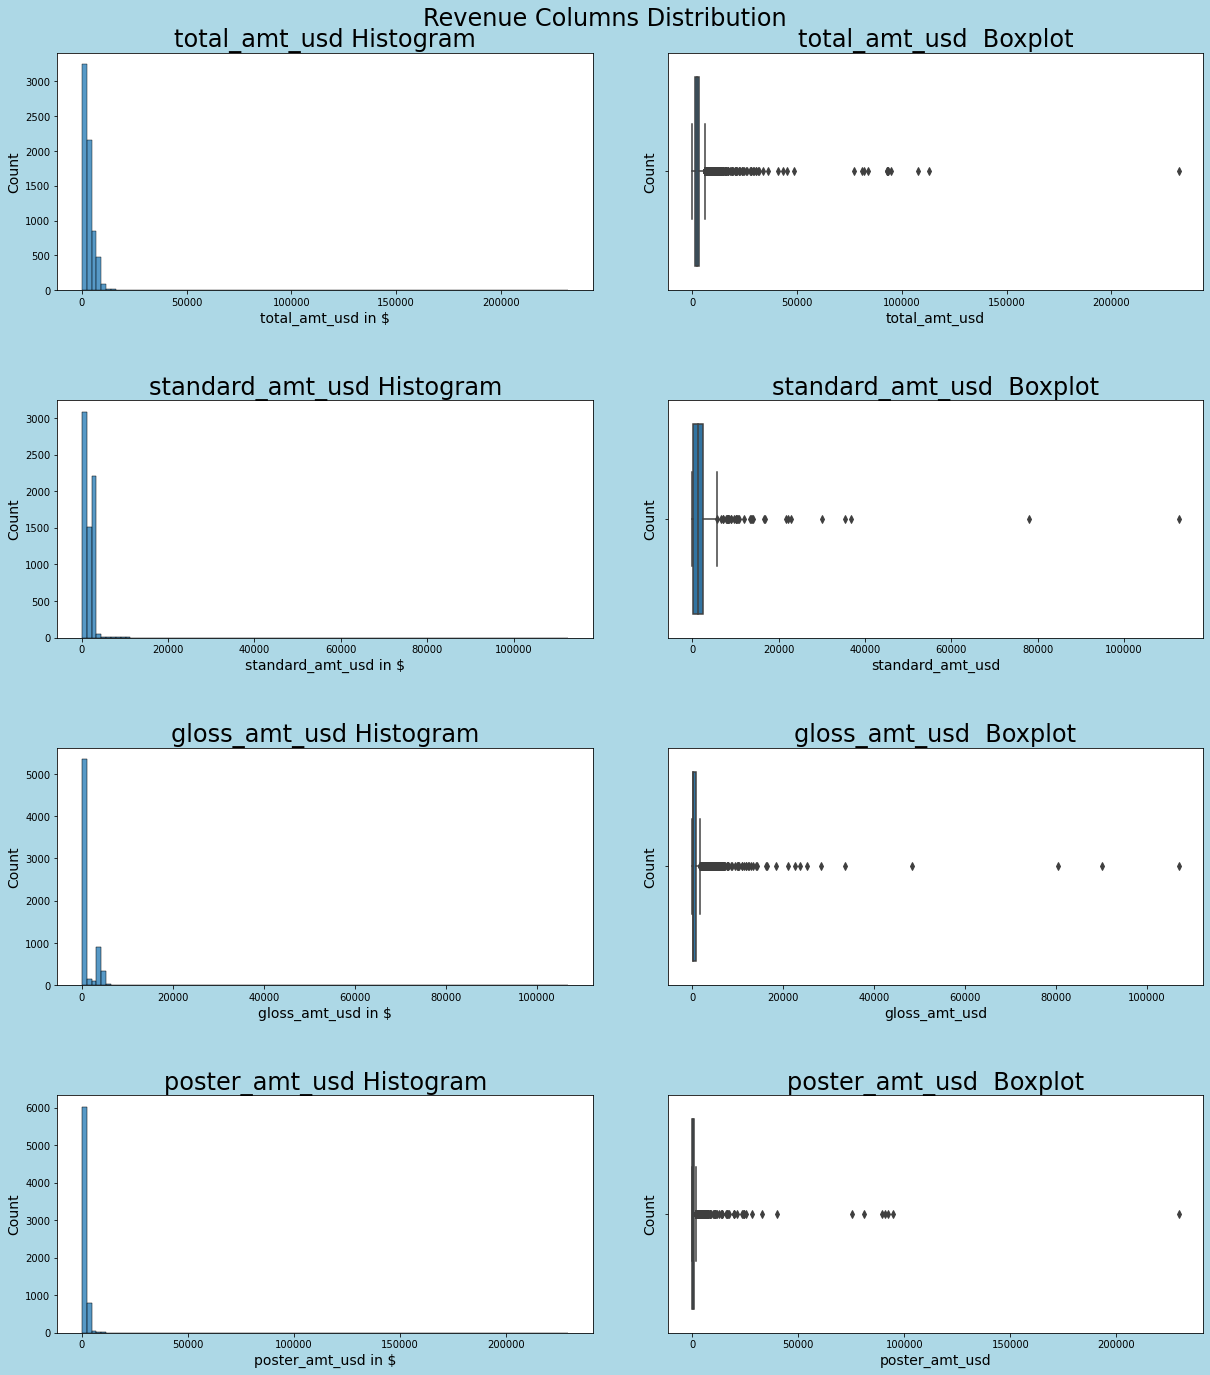

In [37]:
plt.figure(figsize = (18,20), facecolor = 'lightblue')
for i,col in enumerate(rev_cols):
    plt.suptitle('Revenue Columns Distribution', fontsize = 24)
    plt.subplot(4,2,i*2+1)
    #plt.hist(df[col],bins = 100,color = '#335EFF',alpha = 0.75, edgecolor = 'black', linewidth=2)
    sns.histplot(x= df[col], bins = 100)
    plt.title(f'{col} Histogram', fontsize = 24)
    plt.xlabel(f'{col} in $', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)
    
    plt.subplot(4,2,i*2+2)
    sns.boxplot(x = df[col])
    plt.title(f'{col}  Boxplot', fontsize = 24)
    plt.xlabel(f'{col}', fontsize = 14)
    plt.ylabel(f'Count', fontsize = 14)
    plt.tight_layout(pad=5.0)

____
## Part 2: General EDA - Answering Business Questions
____

### 2.1. Sales & Marketing Business Requests

#### Q1- Show the top 10  accounts in term of revenue?

In [38]:
q1 = df.loc[:,['account','total_amt_usd']].\
        groupby('account').\
        sum().sort_values('total_amt_usd', ascending = False).\
        head(10).\
        rename(columns = {'total_amt_usd':'Total Revenue'})

q1.index.name = 'Account'

px.bar(q1,x = q1.index, 
       y = 'Total Revenue', 
       title = 'Top 10 Accounts by Total Revenue', 
       template = 'plotly_dark')

In [39]:
del q1

#### Q2- Show the top 10 locations by revenue?

In [40]:
# aggregating the 'total_amt_usd' by 'coordinates'
q2  = df.loc[:,['coordinates','total_amt_usd']].\
        groupby('coordinates').sum().\
        sort_values('total_amt_usd', ascending = False).\
        head(10)


# initialize the geopy.geocoders
geolocator = Nominatim(user_agent="top10revenuelocations")

locations = []
# loop through each values in the 'oordinates'
for val in q2.index.values:
    # get the location info for each coordinate which is a dictionary
    loc = geolocator.reverse(str(val[0])+","+str(val[1]))
    # use the .raw method to get the dictionary assigned to the 'address' key in the loc ditionary
    # use the .keys() method to get the keys of the 'address' dictionary
    # check if 'city' among the keys of the 'address' dictionary
    if 'city' in  loc.raw['address'].keys():
        # append the value of the key 'city' to 'locations' list
        city = loc.raw['address']['city']
        locations.append(city)
        # if 'city' is not among the keys of the 'address' dictionary, check for 'county'
    elif 'county' in  loc.raw['address'].keys():
        # assign the valu of th 'county' key to variable named county
        county = loc.raw['address']['county']
        # append the county value to the locations
        locations.append(county)
    else:
        locations.append('NA')

q2['location'] = locations


q2

,total_amt_usd,location
coordinates,,
"(38.60820336, -121.28114540000001)",382873.30,Sacramento County
"(38.6431842, -121.9092885)",345618.59,Yolo County
"(40.74381454, -76.80764423)",326819.48,Northumberland County
"(42.35930205, -71.05137356)",300694.79,Boston
"(38.71182916, -121.2192105)",293861.14,Sacramento County
"(35.52252305, -86.10327108)",291047.25,Coffee County
"(41.87858356, -87.62737294)",281018.36,Chicago
"(40.76252413, -73.97753022)",278575.64,New York County
"(33.78951934, -84.43800424)",275288.30,Atlanta


In [41]:
q2.reset_index(inplace = True)

# make a basic map
top10_revenue_locations_map = folium.Map(location = (42.0988316272597 ,-98.82989549371113),zoom_start=4)
# loop through th rows of top10_locations_count


q2.apply(lambda row: folium.Marker(location=[row['coordinates'][0], row['coordinates'][1]],
                                                      popup = row['location']+' Revenue:'+ str(row['total_amt_usd'])).add_to(top10_revenue_locations_map), axis = 1)

print('Zoon-in to see the adjacent locations')
top10_revenue_locations_map


## this code can work on local machine but not here
# for index,row in q2.iterrows():
#     # add a merker for each corrdinate with popup and tooltip
#     folium.Marker(location = [str(row['coordinates'][0]),str(row['coordinates'][1])],
#                   popup = row['location'],
#                   tooltip = row['location']+ str(row['total_amt_usd'])).add_to(top10_revenue_locations_map)
# top10_revenue_locations_map

Zoon-in to see the adjacent locations


#### Q3 - Provide the name for each region for every order, as well as the account name and the total amount spent. However, you should only provide the results if the total quantity exceeds 2000 and the total amount spent exceeds 200000. Your final table should have 3 the region name, account name, and order total amount spent. Sort for the smallest unit price first.

In [42]:
q3 = df.loc[:, ['account','region','primary_poc','total_amt_usd','total']].\
        groupby(['region','account','primary_poc']).\
        sum()

cond1 = q3['total_amt_usd'] > 200000 ; cond2 = q3['total'] > 2000

q3 = q3.loc[(cond1) & (cond2), 'total_amt_usd'].\
        reset_index().\
        sort_values('total_amt_usd',ascending = False).\
        rename(columns = {'total_amt_usd':'Total Amount Spent'})

q3.to_csv('sales&marketingq3.csv')
q3.head()

,region,account,primary_poc,Total Amount Spent
19,West,EOG Resources,Alida Desrosier,382873.30
21,West,Mosaic,Lorette Blasi,345618.59
7,Northeast,IBM,Denis Gros,326819.48
6,Northeast,General Dynamics,Erin Viverette,300694.79
23,West,Republic Services,Gail Widmer,293861.14


In [43]:
px.sunburst(q3, 
            path = ['region','account'], 
            values = 'Total Amount Spent',
            title = 'Accounts with Total Quantity > 2000 and Total Amount Spent > 200000',
            hover_name= 'primary_poc',
            template = 'plotly_dark',
            width = 800)

#### Q4- The Sales & Marketing Dept. is running on limited resources currently, and would like to focus on the 2 type of papers instead of three. Show the two types of papers that generates more revenue on average?

In [44]:
q4 = df.loc[:,['standard_amt_usd','gloss_amt_usd','poster_amt_usd']].\
        melt(var_name = 'Paper Type', value_name = 'Total Revenue').\
        groupby('Paper Type').mean().\
        reset_index().\
        sort_values('Total Revenue', ascending = False)

q4['Paper Type'] = q4['Paper Type'].str.replace('_amt_usd','')

px.bar(q4, x = 'Paper Type', y = 'Total Revenue', 
       title = 'Average Revenue by Paper Type', 
       height = 500,
       template = 'plotly_dark')

In [45]:
from scipy.stats import ttest_ind

Stating the Hypothesis:\
H0: No differnece in average revenue between standard and gloss.\
H1: standard type generates more revenue on average.

In [46]:
stats, p = ttest_ind(df['standard_amt_usd'], df['gloss_amt_usd'])
print('t_score:',stats, 'p_value:',p)

t_score: 7.1886206762729445 p_value: 6.880737845735116e-13


Since the p-value is less than 0.05, there is a significant evidence that standard paper generates more revenue on average

Stating the Hypothesis:\
H0: No differnece in average revenue between gloss and poster.\
H1: gloss type generates more revenue on average.

In [47]:
stats, p = ttest_ind(df['gloss_amt_usd'], df['poster_amt_usd'])
print('t_score:',stats, 'p_value:',p)

t_score: 4.209464833487789 p_value: 2.575948857476572e-05


Since the p-value is less than 0.05, there is a significant evidence that gloss paper generates more revenue on average

### 2.2. HR Business Requests

#### Q1- Provide a table with the region for each sales representative along with their associated accounts. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name?

In [48]:
q1 = df[['region','sales_person','account']].sort_values(by = 'account', ascending= True).drop_duplicates()
print(q1.head())
q1.to_csv('hrq1.csv',index = False)
del q1

         region       sales_person account
978   Northeast       Sibyl Lauria      3M
3557  Southeast  Earlie Schleusner     ADP
3592  Southeast        Moon Torian   AECOM
4670  Southeast     Calvin Ollison     AES
643   Northeast        Elba Felder     AIG


#### Q2- Provide a table that provides the region for each sales representative along with their associated accounts. This time only for the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name?

In [49]:
q2 = df[df['region']=='Midwest'][['region','sales_person','account']].sort_values('account')
q2.to_csv('hrq2.csv')
print(q2.head())
del q2

       region sales_person              account
3128  Midwest  Julie Starr               AbbVie
3129  Midwest  Julie Starr               AbbVie
3130  Midwest  Julie Starr               AbbVie
2462  Midwest  Chau Rowles  Abbott Laboratories
2452  Midwest  Chau Rowles  Abbott Laboratories


#### Q3- Provide a table with the region for each sales representative along with their associated accounts. This time only for accounts where the sales rep has a first name starting with S and in the Midwest region. Your final table should include three columns: the region name, the sales representative name, and the account name. Sort the accounts alphabetically (A-Z) according to account name?

In [50]:
q3 = df[df['sales_person'].str.startswith('S')][['region','sales_person','account']].sort_values('account')
q3.to_csv('hrq3.csv')
print(q3.head())
del q3

        region  sales_person account
980  Northeast  Sibyl Lauria      3M
961  Northeast  Sibyl Lauria      3M
962  Northeast  Sibyl Lauria      3M
963  Northeast  Sibyl Lauria      3M
964  Northeast  Sibyl Lauria      3M


#### Q4- Provide a table that provides the region for each sales representative along with their associated accounts. This time only for accounts where the sales rep has a last name starting with K and in the Midwest region. Your final table should include three columns: the region name, the sales rep name, and the account name. Sort the accounts alphabetically (A-Z) according to account name?

In [51]:
sales_person_condition = df['sales_person'].str.split(' ').str.get(1).str.startswith('K')
region_condition = df['region'] == 'Midwest'

q4 = df[sales_person_condition & region_condition][['region','sales_person','account']].sort_values('account')
print(q4.head())

q4.to_csv('hrq4.csv')
del q4

       region  sales_person account
2931  Midwest  Delilah Krum   Amgen
2935  Midwest  Delilah Krum   Amgen
2934  Midwest  Delilah Krum   Amgen
2933  Midwest  Delilah Krum   Amgen
2932  Midwest  Delilah Krum   Amgen


#### Q5- Find the number of sales reps in each region. Your final table should have two columns - the region and the number of sales representative. Order from fewest reps to most reps?

In [52]:
 q5 = (df.groupby('region').
       agg({'sales_person':'count'}).
       reset_index().
       rename(columns = {'sales_person':'sales_person_count'}))
    
print(q5)

del q5

      region  sales_person_count
0    Midwest                 897
1  Northeast                2356
2  Southeast                2024
3       West                1634


#### Q6- Have any sales reps worked on more than 10 account?

In [53]:
q6 = df[['sales_person','account']].\
     drop_duplicates().\
     groupby('sales_person').\
     agg({'account':'count'}).\
     rename(columns = {'account':'account_count'})

print(q6[q6['account_count']>10])

q6 = len(q6[q6['account_count']>10])


print('Number of sales person worked with more than one account:', q6)

del q6

                     account_count
sales_person                      
Calvin Ollison                  11
Dorotha Seawell                 11
Earlie Schleusner               11
Georgianna Chisholm             15
Maren Musto                     11
Maryanna Fiorentino             11
Micha Woodford                  11
Vernita Plump                   11
Number of sales person worked with more than one account: 8


#### Q7- How many of the sales reps have more than 4 accounts that they manage?

In [54]:
q7 = df[['sales_person','account']].\
     drop_duplicates().\
     groupby('sales_person').\
     agg({'account':'count'}).\
     rename(columns = {'account':'account_count'})

q7 = len(q7[q7['account_count']>4])

print('Number of sales person worked with more than one account:', q7)

del q7

Number of sales person worked with more than one account: 37


#### Q8- We would like to identify top performing salespeople, which are sales reps associated with more than 200 orders or more than 750000 in total sales. The middle group has any rep with more than 150 orders or 500000 in sales. Create a table with the sales person name, the total number of orders, total sales across all orders, and a column with top, middle, or low depending on this criteria. Place the top sales people based on dollar amount of sales first in your final table

In [55]:
q8 = df.groupby('sales_person').\
     agg({'order_id':'count','total_amt_usd':'sum'}).\
     rename(columns = {'order_id':'orders_count','total_amt_usd':'total_sales'}).\
     reset_index()

q8.loc[(q8['orders_count'] > 200)|(q8['total_sales']>750000), 'sales_person_level'] = 'high'
q8.loc[(q8['orders_count'] > 150)|(q8['total_sales'] >500000),'sales_person_level'] = 'middle'
q8.loc[(q8['orders_count'] <= 150)|(q8['total_sales'] <=500000),'sales_person_level'] = 'low'

q8.sort_values('total_sales', ascending=False , inplace = True)

print(q8)

q8.to_csv('hrq8.csv')

del q8

             sales_person  orders_count  total_sales sales_person_level
17      Earlie Schleusner           335   1098137.72             middle
48              Tia Amato           267   1010690.60             middle
49          Vernita Plump           299    934212.93             middle
23    Georgianna Chisholm           256    886244.12             middle
1         Arica Stoltzfus           186    810353.34             middle
16        Dorotha Seawell           208    766935.04             middle
38            Nelle Meaux           241    749076.16             middle
45           Sibyl Lauria           192    721694.02             middle
30            Maren Musto           224    702697.29             middle
4            Brandie Riva           167    675917.64             middle
8         Charles Bidwell           205    675637.19             middle
20           Elwood Shutt           191    662500.24             middle
32    Maryanna Fiorentino           204    655954.74            

### 2.3. Finance Business Requests

#### Q1- Provide a timeline for montly revenue in 2015?

In [56]:
q1 = (df.loc[df['order_date_time'].dt.year == 2015,['order_date_time','total_amt_usd']].
      set_index('order_date_time').resample('m').
      sum()
     )
q1.to_csv('financialq1.csv')

q1= px.line(q1, y = 'total_amt_usd', 
            title = 'Monthly Revenue of 2015', 
            template = 'plotly_dark',
            height =500)

q1.update_layout(xaxis_title = 'Date',yaxis_title = 'Monthly Rev.')

In [57]:
del q1

#### Q2- Provide a monthly revenue for each type of paprer in 2015?

In [58]:
# make a dataframe for monthly revenue of standard paper in 2015
q2_standard = df.loc[df['order_date_time'].dt.year == 2015,['order_date_time','standard_amt_usd']]
q2_standard = q2_standard.set_index('order_date_time').resample('m').sum()
q2_standard = q2_standard.rename(columns = {'standard_amt_usd':'revenue'})
q2_standard['paper_type'] = 'Standard Paper'

# make a dataframe for monthly revenue of gloss paper in 2015
q2_gloss = df.loc[df['order_date_time'].dt.year == 2015,['order_date_time','gloss_amt_usd']]
q2_gloss = q2_gloss.set_index('order_date_time').resample('m').sum()
q2_gloss = q2_gloss.rename(columns = {'gloss_amt_usd':'revenue'})
q2_gloss['paper_type'] = 'Gloss Paper'

# make a dataframe for monthly revenue of poster paper in 2015
q2_poster = df.loc[df['order_date_time'].dt.year == 2015,['order_date_time','poster_amt_usd']]
q2_poster = q2_poster.set_index('order_date_time').resample('m').sum()
q2_poster = q2_poster.rename(columns = {'poster_amt_usd':'revenue'})
q2_poster['paper_type'] = 'Poster Paper'

# concatenate the 3 dataframes
q2 = q2_standard.append(q2_gloss).append(q2_poster)

q2.to_csv('financialq2.csv')

# plot the resultant dataframe
q2 = px.line(q2, y = 'revenue', 
             title = 'Monthly Revenue of 2015', 
             template = 'plotly_dark',
             color = 'paper_type',
             height =500)

q2.update_layout(xaxis_title = 'Date',yaxis_title = 'Monthly Rev.')

In [59]:
del q2,  q2_standard, q2_gloss, q2_poster

#### Q3- For the year 2016, provide the monthly revenue and the runnning monthly revenue?

In [60]:
q3 = df.loc[df['order_date_time'].dt.year == 2016, ['order_date_time','total_amt_usd']].\
        set_index('order_date_time').\
        resample('M').sum().\
        rename(columns = {'total_amt_usd':'monthly_revenue'})



q3['running_monthly_revenue'] = q3.expanding().sum()



q3.to_csv('financialq4.csv')

trace1 = go.Scatter(x = q3.index,y= q3['monthly_revenue'], mode ='lines', name = 'Monthly Average')
trace2 = go.Scatter(x = q3.index,y= q3['running_monthly_revenue'], mode ='lines', name = 'Running Monthly Revenue')

traces = [trace1, trace2]

fig = go.Figure(data = traces)

fig.update_layout(title='Monthly Avg & Monthly Running Revenue', 
                  xaxis_title='Date', 
                  yaxis_title='Amount in USD',
                 height = 500)
fig.layout.template = ('plotly_dark')
fig.layout.legend.x = 0.05


fig.show()

# fig = px.line(q3, x = 'order_date_time', 
#         y = ['monthyl_revenue','running_monthly_revenue'], 
#         height = 300,
#         template = 'plotly_dark')

# fig.update_layout(title='Monthly Rev. vs Monthly Running Rev.', 
#                   xaxis_title='Date', 
#                   yaxis_title='Amount in USD')


In [61]:
del q3

#### Q4- Provide the montly revenue along with monthly moving average of revenue (2 periods) for the timeline of the entire period ?

In [62]:
q4 = df.loc[:,['order_date_time','total_amt_usd']].\
        set_index('order_date_time').\
        resample('M').sum()

q4['monthly_moving_avg_of_revenue'] = q4.rolling(2).mean()

q4.rename(columns = {'total_amt_usd':'monthly_revenue'}, inplace = True)



trace1 = go.Scatter(x = q4.index,y= q4['monthly_revenue'], mode ='lines', name = 'Monthly Average')
trace2 = go.Scatter(x = q4.index,y= q4['monthly_moving_avg_of_revenue'], mode ='lines', 
                    name = 'Monthly Moving Average of Revenue')
traces = [trace1, trace2]
fig = go.Figure(data = traces,
               )
fig.update_layout(title='Monthly Avg vs. Monthly Moving Avg. of Rev.', 
                  xaxis_title='Date', 
                  yaxis_title='Amount in USD',
                 height = 500)
fig.layout.template = ('plotly_dark')
fig.layout.legend.x = 0.05

fig.show()

In [63]:
del q4

#### Q5- Show the monthly change in revenue of the entire period ?

In [64]:
q5 = df.loc[:,['order_date_time','total_amt_usd']].\
        set_index('order_date_time').\
        resample('M').sum()
q5['change_in_monthly_revenue'] = q5['total_amt_usd'].pct_change()

fig = px.bar(q5, x = q5.index, y = 'change_in_monthly_revenue',color = 'change_in_monthly_revenue',
       title = 'Change in Monthly Revenue',
       template = 'plotly_dark'
            )
fig.update_layout( xaxis_title='Date', 
                  yaxis_title='Change in  Revenue',
                 height = 500)
fig.show()